#SCC - ICMC - USP
#**MBA EM INTELIGENCIA ARTIFICIAL E BIGDATA**
## **CURSO 2 - CD, AM E DM**
## **PROFA. ROSELI AP. FRANCELIN ROMERO**
---

# **Exemplo - Exploração e visualização de dados**

## **OBJETIVO:**
### Trabalhar com  MOMENTOS CENTRALIZADOS
### DADOS MULTIDIMENSIONAIS

Considere o conjunto de dados dos jogadores de futebol, que está no formato .csv.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
jogo = pd.read_csv('jogadores.csv')
player = pd.read_csv('player_attributes.csv')

### Questão 01.

Calcule os quatro momentos (média, variância, obliquidade e achatamento) para cada atributo do tipo numerico (float) do conjunto jogadores.csv.


In [5]:
jogo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  350 non-null    int64  
 1   player_api_id       350 non-null    int64  
 2   player_name         350 non-null    object 
 3   player_fifa_api_id  350 non-null    int64  
 4   birthday            350 non-null    object 
 5   height              350 non-null    float64
 6   weight              350 non-null    float64
 7   age                 350 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 22.0+ KB


In [6]:
# calculo dos 4 momentos para cada um dos atributos: height, weight, age
print(jogo['height'].describe())
print(jogo['weight'].describe())
print(jogo['age'].describe())



count    350.000000
mean       1.820164
std        0.060569
min        1.651000
25%        1.778000
50%        1.828800
75%        1.854200
max        1.981200
Name: height, dtype: float64
count    350.000000
mean      76.454938
std        6.425071
min       58.967008
25%       72.121187
50%       76.203518
75%       81.193034
max       96.161582
Name: weight, dtype: float64
count    350.000000
mean      34.305714
std        5.144415
min       22.000000
25%       31.000000
50%       34.000000
75%       38.000000
max       49.000000
Name: age, dtype: float64


In [7]:
#média
media_altura = jogo['height'].mean()
media_peso = jogo['weight'].mean()
media_idade = jogo['age'].mean()
print("Media altura é:", media_altura, "\n","media do peso", media_peso, "\n", "media da idade", media_idade)
print("\n")

#variância
variancia_altura = jogo['height'].var()
variancia_peso = jogo['weight'].var()
variancia_idade = jogo['age'].var()
print("Variancia altura é:", variancia_altura, "\n","Variancia do peso", variancia_peso, "\n", "Variancia da idade", variancia_idade)
print("\n")

#obliquidade
obliq_altura = jogo['height'].skew()
obliq_peso = jogo['weight'].skew()
obliq_idade = jogo['age'].skew()
print("Obliquidade altura é:", obliq_altura, "\n","Obliquidade do peso", obliq_peso, "\n", "Obliquidade da idade", obliq_idade)
print("\n")

#achatamento ou curtose

kurt_altura = jogo['height'].kurtosis()
kurt_peso = jogo['weight'].kurtosis()
kurt_idade = jogo['age'].kurtosis()
print("Achatamento altura é:", kurt_altura, "\n","Achatamento do peso", kurt_peso, "\n", "Achatamento da idade", kurt_idade)
print("\n")

Media altura é: 1.8201639999999997 
 media do peso 76.4549379308 
 media da idade 34.30571428571429


Variancia altura é: 0.003668612683094556 
 Variancia do peso 41.28153862517228 
 Variancia da idade 26.46501023331969


Obliquidade altura é: -0.12007981638318897 
 Obliquidade do peso 0.03027696608291131 
 Obliquidade da idade 0.2998913445412143


Achatamento altura é: -0.4321787984728007 
 Achatamento do peso -0.10866518706788009 
 Achatamento da idade -0.3340241472353571




### Questão 02.

Gere o boxplot de atributo 'height' do conjunto, analise se os dados estão centrados (simetria) e estime os quartis deste atributo.

<Axes: >

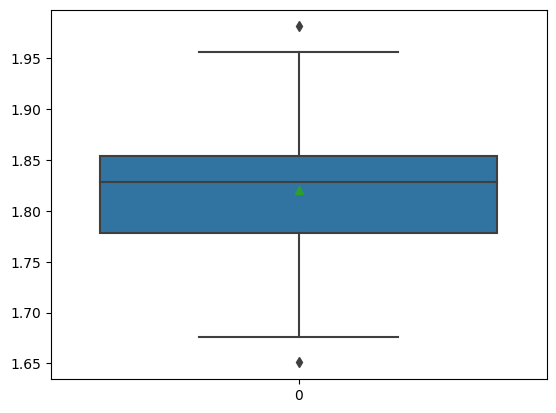

In [8]:
sns.boxplot(jogo['height'], showmeans = True)

In [9]:
print(jogo['height'].describe())

count    350.000000
mean       1.820164
std        0.060569
min        1.651000
25%        1.778000
50%        1.828800
75%        1.854200
max        1.981200
Name: height, dtype: float64


### Questão 03.
O arquivo **player_attributes.csv** contém mais informações sobre os jogadores. Combine suas informações com o DataFrame já existente.

Caso um atributo não esteja disponível para algum jogador, substitua o valor NaN pela média ou valor mais comum para aquele atributo.

- Dica1: Utilize a função [merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) para combinar dois DataFrames que contém ao menos um atributo em comum

- Dica 2: Ambos DataFrames possuem o atributo "player_api_id"

In [10]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           350 non-null    int64  
 1   id                   350 non-null    int64  
 2   player_fifa_api_id   350 non-null    int64  
 3   player_api_id        350 non-null    int64  
 4   date                 350 non-null    object 
 5   overall_rating       350 non-null    float64
 6   potential            350 non-null    float64
 7   preferred_foot       350 non-null    object 
 8   attacking_work_rate  319 non-null    object 
 9   defensive_work_rate  350 non-null    object 
 10  crossing             350 non-null    float64
 11  finishing            350 non-null    float64
 12  heading_accuracy     350 non-null    float64
 13  short_passing        350 non-null    float64
 14  volleys              335 non-null    float64
 15  dribbling            350 non-null    flo

In [11]:
novo = jogo.merge(player, on='player_api_id', how = 'right')
novo.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,age,Unnamed: 0,id_y,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,27,3264,Abdelmalek Cherrad,51868,1981-01-14 00:00:00,1.8542,74.842741,40,451,452,...,66.0,41.0,30.0,34.0,36.0,13.0,7.0,7.0,9.0,13.0
1,32,32637,Abdessalam Benjelloun,177295,1985-01-28 00:00:00,1.8796,81.193034,36,484,485,...,NaN,66.0,22.0,27.0,NaN,7.0,20.0,35.0,20.0,20.0
2,87,495841,Adalberto Penaranda,231638,1997-05-31 00:00:00,1.8288,78.017888,24,1329,1330,...,59.0,77.0,20.0,20.0,21.0,6.0,14.0,13.0,8.0,6.0
3,115,69518,Adam Marciniak,179055,1988-09-28 00:00:00,1.8288,82.100219,32,1887,1888,...,39.0,46.0,59.0,70.0,68.0,6.0,9.0,12.0,15.0,10.0
4,118,170593,Adam Matthews,193768,1992-01-13 00:00:00,1.7780,71.214002,29,1925,1926,...,69.0,50.0,73.0,75.0,74.0,6.0,15.0,12.0,6.0,14.0


In [12]:
novo.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_x                  350 non-null    int64  
 1   player_api_id         350 non-null    int64  
 2   player_name           350 non-null    object 
 3   player_fifa_api_id_x  350 non-null    int64  
 4   birthday              350 non-null    object 
 5   height                350 non-null    float64
 6   weight                350 non-null    float64
 7   age                   350 non-null    int64  
 8   Unnamed: 0            350 non-null    int64  
 9   id_y                  350 non-null    int64  
 10  player_fifa_api_id_y  350 non-null    int64  
 11  date                  350 non-null    object 
 12  overall_rating        350 non-null    float64
 13  potential             350 non-null    float64
 14  preferred_foot        350 non-null    object 
 15  attacking_work_rate   3

Vamos fazer a imputação: preenchimentos dos dados faltantes

In [13]:
df_numeric = novo.select_dtypes(include='number')
for col in df_numeric.columns:
    novo[col] = novo[col].fillna(novo[col].mean())

df_categoric = novo.select_dtypes(include='object')
for col in df_categoric.columns:
    novo[col] = novo[col].fillna(novo[col].mode())

In [14]:
novo

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,age,Unnamed: 0,id_y,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,27,3264,Abdelmalek Cherrad,51868,1981-01-14 00:00:00,1.8542,74.842741,40,451,452,...,66.000000,41.0,30.0,34.0,36.000000,13.0,7.0,7.0,9.0,13.0
1,32,32637,Abdessalam Benjelloun,177295,1985-01-28 00:00:00,1.8796,81.193034,36,484,485,...,55.307463,66.0,22.0,27.0,47.268657,7.0,20.0,35.0,20.0,20.0
2,87,495841,Adalberto Penaranda,231638,1997-05-31 00:00:00,1.8288,78.017888,24,1329,1330,...,59.000000,77.0,20.0,20.0,21.000000,6.0,14.0,13.0,8.0,6.0
3,115,69518,Adam Marciniak,179055,1988-09-28 00:00:00,1.8288,82.100219,32,1887,1888,...,39.000000,46.0,59.0,70.0,68.000000,6.0,9.0,12.0,15.0,10.0
4,118,170593,Adam Matthews,193768,1992-01-13 00:00:00,1.7780,71.214002,29,1925,1926,...,69.000000,50.0,73.0,75.0,74.000000,6.0,15.0,12.0,6.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,10983,25538,Youssouf Hadji,116368,1980-02-25 00:00:00,1.8288,78.017888,41,182574,182575,...,68.000000,74.0,24.0,39.0,26.000000,12.0,10.0,13.0,16.0,8.0
346,10998,302079,Yuya Kubo,217242,1993-12-24 00:00:00,1.7780,72.121187,27,182826,182827,...,70.000000,51.0,38.0,49.0,51.000000,9.0,11.0,14.0,11.0,12.0
347,11004,25199,Yves Makaba-Makalamby,152552,1986-01-31 00:00:00,1.9812,96.161582,35,182896,182897,...,35.000000,20.0,12.0,15.0,19.000000,67.0,58.0,61.0,60.0,68.0
348,11036,25906,Ze Manuel,139083,1975-02-22 00:00:00,1.6764,64.863709,46,183444,183445,...,55.307463,74.0,41.0,36.0,47.268657,8.0,23.0,68.0,23.0,23.0
